# Creating predictions of insurance by some data that already exist

The data used comes from:
https://www.kaggle.com/

I will create a regression analysis

Importing the requieres libraries

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

# Read in the insurance dataset URL
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
insurance["sex"], insurance["age"]

(0       female
 1         male
 2         male
 3         male
 4         male
          ...  
 1333      male
 1334    female
 1335    female
 1336    female
 1337    female
 Name: sex, Length: 1338, dtype: object,
 0       19
 1       18
 2       28
 3       33
 4       32
         ..
 1333    50
 1334    18
 1335    18
 1336    21
 1337    61
 Name: age, Length: 1338, dtype: int64)

## Numerical Encoding
Since I am working with categories I believe One-Hot Encoding algorithm is enough

In [3]:
# Trying to one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [4]:
# Creating x, y values (features and labels)
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [5]:
# View feature matrix x
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [6]:
# View label vector y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [7]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
len(x), len(x_train), len(x_test)

(1338, 1070, 268)

In [8]:
x_train #Randomly shuffle

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.950,2,True,False,True,False,False,True,False,False
1285,47,24.320,0,True,False,True,False,True,False,False,False
1142,52,24.860,0,True,False,True,False,False,False,True,False
969,39,34.320,5,True,False,True,False,False,False,True,False
486,54,21.470,3,True,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1095,18,31.350,4,True,False,True,False,True,False,False,False
1130,39,23.870,5,True,False,True,False,False,False,True,False
1294,58,25.175,0,False,True,True,False,True,False,False,False
860,37,47.600,2,True,False,False,True,False,False,False,True


In [9]:
# Build some neural networks
tf.random.set_seed(42)

In [10]:
# Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# Fit the model
insurance_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 10315.0449 - mae: 10315.0449
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7470.3647 - mae: 7470.3647
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7983.5703 - mae: 7983.5703
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7651.3408 - mae: 7651.3408
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7875.7202 - mae: 7875.7202
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7494.8750 - mae: 7494.8750
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7309.4263 - mae: 7309.4263
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 7705.2295 - mae: 7705.2295
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 7289.2065 - mae: 7289.2065
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 7341.6533 - mae: 7341.6533
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7395.6602 - mae: 7395.6602
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [11]:
# Check the result of the insurance model on the test data
insurance_model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8052.1270 - mae: 8052.1270  


[8019.27880859375, 8019.27880859375]

So far not good, mae is 8005 and the mean is 13346 almost half of the value and the median is even worst
Just a reminder
median is the middle of the values
mean is average of the values

In [12]:
# Check how good or bad is mae
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

### Try to improve the model

In [13]:
# add an extra layer to the model with more hidden units

# Create a model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# Fit the model
insurance_model_2.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - mae: nan                 
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: nan - mae: nan 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: nan - mae: nan
Epoch 13/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: nan - mae: nan  
Epoch 14/1

In [14]:
# It seem the model is too much complex to learn anything...

In [15]:
# Create a model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
# Fit the model
insurance_model_3.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13255.7305 - mae: 13255.7305
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13074.5068 - mae: 13074.5068
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12723.1719 - mae: 12723.1719
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12054.6113 - mae: 12054.6113
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10947.9189 - mae: 10947.9189
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9527.2773 - mae: 9527.2773
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8191.3789 - mae: 8191.3789
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7510.5630 - mae: 7510.5630
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7404.5249 - mae: 7404.5249
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7378.4053 - mae: 7378.4053 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7356.3501 - mae: 7356.3501
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0

In [16]:
# Evaluate model_3
insurance_model_3.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4768.9258 - mae: 4768.9258  


[4639.96435546875, 4639.96435546875]

In [17]:
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

history_4 = insurance_model_4.fit(x_train, y_train, epochs=200)


Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13253.5684 - mae: 13253.5684
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13074.1436 - mae: 13074.1436
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12741.1465 - mae: 12741.1465
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12113.2227 - mae: 12113.2227
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11058.8350 - mae: 11058.8350
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9666.9268 - mae: 9666.9268
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8297.8604 - mae: 8297.8604
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7528.5034 - mae: 7528.5034
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7392.2124 - mae: 7392.2124
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7364.5264 - mae: 7364.5264
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7343.8677 - mae: 7343.8677
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s

In [18]:
#Evaluate
insurance_model_4.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3478.7791 - mae: 3478.7791  


[3411.0859375, 3411.0859375]

In [19]:
insurance_model.evaluate(x_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8052.1270 - mae: 8052.1270 


[8019.27880859375, 8019.27880859375]

Text(0.5, 0, 'epochs')

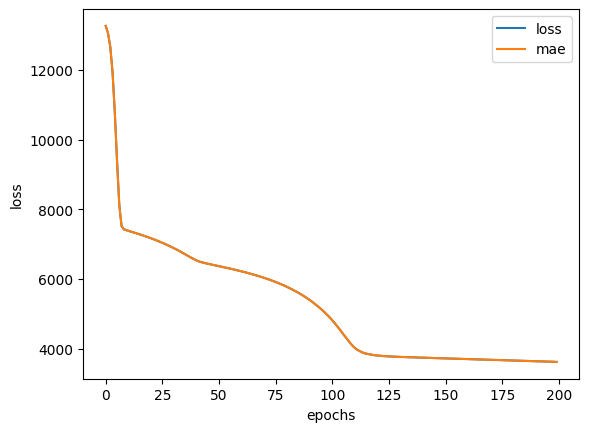

In [20]:
# Plot history (loss curve or training curve)
pd.DataFrame(history_4.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")


## Prepocessing data (normalization and standardization)


In [21]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,False,True,True,False,False,True,False,False
1334,18,31.920,0,True,False,True,False,True,False,False,False
1335,18,36.850,0,True,False,True,False,False,False,True,False
1336,21,25.800,0,True,False,True,False,False,False,False,True


<Axes: >

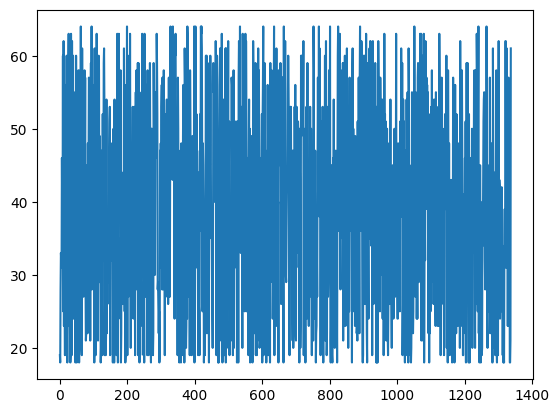

In [22]:
x["age"].plot()

<Axes: ylabel='Frequency'>

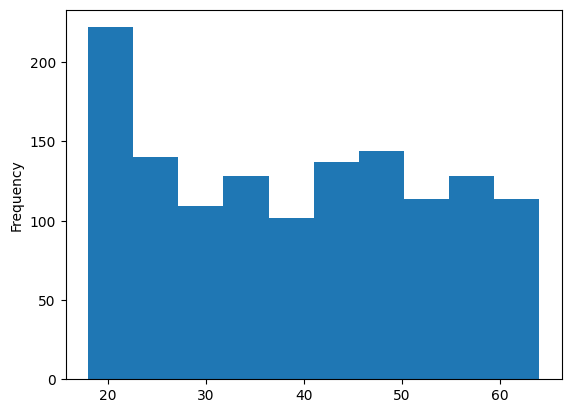

In [23]:
x["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

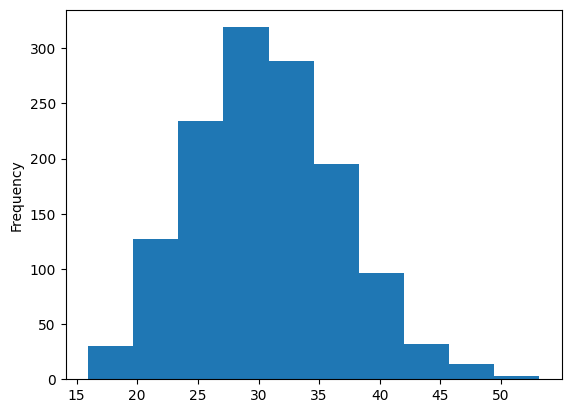

In [24]:
x["bmi"].plot(kind="hist")

(children
 0    574
 1    324
 2    240
 3    157
 4     25
 5     18
 Name: count, dtype: int64,
 <Axes: ylabel='Frequency'>)

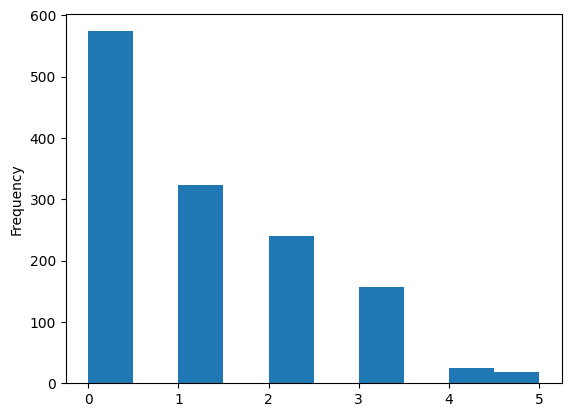

In [25]:
x["children"].value_counts() , x["children"].plot(kind="hist")

I think it is a good idea to normalize the data by scaling (convert values into 0 and 1)

In [26]:
# Starting from scratch
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
tf.random.set_seed(42)
# Read in the insurance dataset URL
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [27]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1 (these are the numerical columns)
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

#Create x & y
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build out train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=42)

#Fit column tranforme to our trainig data
ct.fit(x_train)

#Transform training and test data
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [28]:
x_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [29]:
x_train_normal[24], x_train_normal.dtype

(array([0.19565217, 0.05367232, 0.4       , 1.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        ]),
 dtype('float64'))

In [30]:
x_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [31]:
x_train.shape, x_train_normal.shape
# (x, 6)  -> 6 different columns (age, children...)
# (x, 11) -> because we turn into 0 & 1 some of the columns and we get more columns BUT now they are normalized

((1070, 6), (1070, 11))

## The data looks normalized
Build a new model and evaluate

In [34]:
insurance_n_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_n_1.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["mae"])

history_n_1 = insurance_n_1.fit(x_train_normal, y_train, epochs=600)

Epoch 1/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 13296.2715 - mae: 13296.2715
Epoch 2/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13285.9785 - mae: 13285.9785
Epoch 3/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13261.5898 - mae: 13261.5898
Epoch 4/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13212.6475 - mae: 13212.6475
Epoch 5/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13128.4082 - mae: 13128.4082
Epoch 6/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12997.6279 - mae: 12997.6279 
Epoch 7/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12809.3193 - mae: 12809.3193
Epoch 8/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12553.7305 - mae: 12553.7305
Epoch 9/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12220.8955 - mae: 12220.8955
Epoch 10/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11807.1689 - mae: 11807.1689
Epoch 11/600
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11326.3379 - mae: 11326.3379
Epoch 12/600
34/34 ━━━━━━━━━━

In [33]:
# Evaluate
insurance_n_1.evaluate(x_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3213.8354 - mae: 3213.8354  


[3161.03125, 3161.03125]

In [36]:
# Make predictions
y_pred = insurance_n_1.predict(x_test_normal)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [37]:
y_pred

array([[ 9356.467  ],
       [ 6081.081  ],
       [44605.176  ],
       [ 9196.409  ],
       [32477.098  ],
       [ 5678.4365 ],
       [ 1224.8353 ],
       [13337.4    ],
       [ 3673.491  ],
       [10134.425  ],
       [35807.203  ],
       [ 7716.8594 ],
       [ 4296.5864 ],
       [41005.32   ],
       [43412.453  ],
       [40694.54   ],
       [10626.716  ],
       [40693.566  ],
       [ 8700.575  ],
       [39069.84   ],
       [ 3971.5942 ],
       [ 7939.5835 ],
       [  695.7469 ],
       [ 3217.73   ],
       [10887.903  ],
       [11296.281  ],
       [12256.237  ],
       [ 4939.3877 ],
       [ 9954.894  ],
       [  502.36615],
       [ 8309.939  ],
       [11706.673  ],
       [ 2048.0234 ],
       [ 5207.6436 ],
       [ 2924.7256 ],
       [ 8761.855  ],
       [ 1945.176  ],
       [ 7919.108  ],
       [41708.24   ],
       [37204.207  ],
       [ 3143.4626 ],
       [ 2342.8284 ],
       [11640.751  ],
       [11397.204  ],
       [ 5544.4155 ],
       [11

In [42]:
def getMae(y_true, y_pred):
  """
  Show the mae
  """
  mae = tf.keras.metrics.MeanAbsoluteError()
  mae.update_state(y_true=y_true, y_pred=y_pred)
  return mae.result().numpy()

In [43]:
def getMse(y_true, y_pred):
  """
  Show the mse
  """
  mse = tf.keras.losses.MeanSquaredError()
  return mse(y_true=y_true, y_pred=y_pred).numpy()

In [45]:
getMse(y_test, y_pred)

43310964.0

In [46]:
getMae(y_test, y_pred)

3159.8386

In [47]:
# Create a plotting function
def plot_predictions(train_data=x_train_normal,
                     train_labels=y_train,
                     test_data=x_test_normal,
                     test_labels=y_test,
                     predictions=y_pred):

    """
    Plots training data, test data and compares predictions to ground truth labels.
    """

    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    # using the first column of train_data to plot to be able to draw
    plt.scatter(train_data[:,0], train_labels, c='b', label='Training data')
    # Plot testing data in green
    plt.scatter(test_data[:,0], test_labels, c='g', label='Testing data') #Using the first column of test_data to plot
    # Plot models predictions in red
    plt.scatter(test_data[:,0], predictions, c='r', label='Predictions')#Using the first column of test_data to plot
    # Show the legend
    plt.legend();

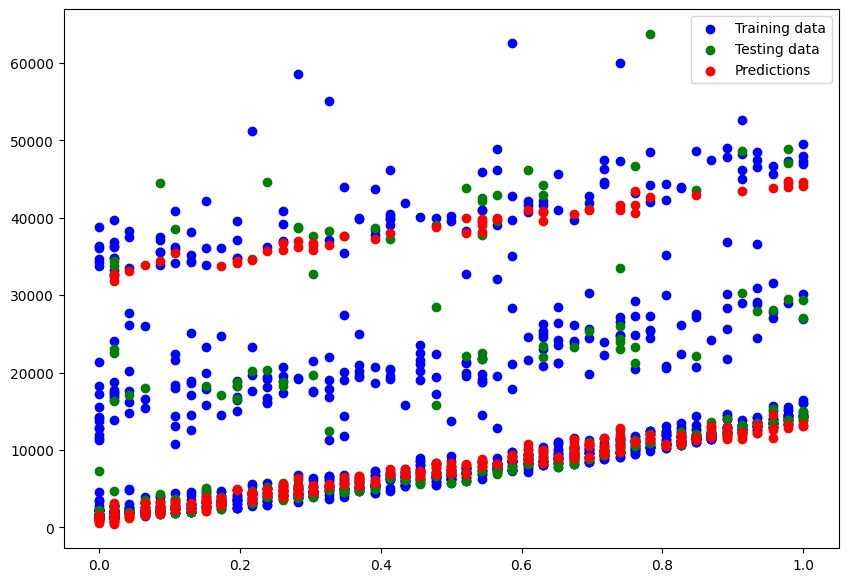

In [48]:
plot_predictions()